# Integrate All ten datasets in one Visualization

### Import modules, set paths, load files:

In [1]:
# !pip install scanpy
# !pip install ipywidgets
import scanpy as sc
import anndata
import numpy as np
import pandas as pd
import os

from tqdm import tqdm

In [2]:
# !pip install scarches
# !pip install -U pandas==2.0

import scarches as sca

 captum (see https://github.com/pytorch/captum).


In [3]:
# https://github.com/huggingface/transformers/issues/29763
# pip install transformers==4.37.2
import torch

In [4]:
import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=UserWarning)

In [5]:
sc.set_figure_params(dpi=120, figsize=(8, 8))

# Filter the data and then visualise

In [6]:
adata_concat = sc.read('/home/fanhuan/data/BioInfo/453k/all-with_annotation-pca_1000.h5ad')
adata_concat

AnnData object with n_obs × n_vars = 453251 × 60286
    obs: 'CL_label'
    var: 'hugo_symbol'
    uns: 'pca'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'spliced', 'spliced_unspliced_sum', 'unspliced'

In [7]:
adata_concat.obs['CL_label'].value_counts()['capillary endothelial cell']

119435

In [8]:
list_more_than_1000 = []
series_all = adata_concat.obs['CL_label'].value_counts()

for i,v in series_all.items():
    if series_all[i] >= 1000:
        list_more_than_1000.append(i)

len(list_more_than_1000)

24

In [9]:
filtered_adata = adata_concat[adata_concat.obs['CL_label'].isin(list_more_than_1000)]

In [10]:
filtered_adata

View of AnnData object with n_obs × n_vars = 448714 × 60286
    obs: 'CL_label'
    var: 'hugo_symbol'
    uns: 'pca'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'spliced', 'spliced_unspliced_sum', 'unspliced'

In [11]:
sc.tl.tsne(filtered_adata, use_rep='X_pca')

# Try further t-SNE parameter settings

In [14]:
from openTSNE import TSNE

pca_target = filtered_adata.obsm['X_pca']
xy = TSNE(perplexity=20, exaggeration=1.5).fit(pca_target)

In [15]:
# create np.array matrix based on the previous calculation result

tsne_p_list = []
for i in tqdm(xy):
        
    temp_list = [i[0], i[1]]
    tsne_p_list.append(temp_list)

tsne_p_array = np.array(tsne_p_list)
tsne_p_array.shape

100%|█████████████████████████████████████████████████████████████████████████| 448714/448714 [00:00<00:00, 520467.55it/s]


(448714, 2)

In [16]:
filtered_adata.obsm['X_tsne_p'] = tsne_p_array
filtered_adata

AnnData object with n_obs × n_vars = 448714 × 60286
    obs: 'CL_label'
    var: 'hugo_symbol'
    uns: 'pca', 'tsne', 'CL_label_colors'
    obsm: 'X_pca', 'X_tsne', 'X_tsne_p'
    varm: 'PCs'
    layers: 'spliced', 'spliced_unspliced_sum', 'unspliced'

In [17]:
from openTSNE import TSNE

pca_target = filtered_adata.obsm['X_pca']
xy = TSNE(perplexity=20, exaggeration=2.8).fit(pca_target)

In [18]:
# create np.array matrix based on the previous calculation result

tsne_p_list = []
for i in tqdm(xy):
        
    temp_list = [i[0], i[1]]
    tsne_p_list.append(temp_list)

tsne_p_array = np.array(tsne_p_list)
tsne_p_array.shape

100%|█████████████████████████████████████████████████████████████████████████| 448714/448714 [00:00<00:00, 682617.35it/s]


(448714, 2)

In [19]:
filtered_adata.obsm['X_tsne_p0'] = tsne_p_array
filtered_adata

AnnData object with n_obs × n_vars = 448714 × 60286
    obs: 'CL_label'
    var: 'hugo_symbol'
    uns: 'pca', 'tsne', 'CL_label_colors'
    obsm: 'X_pca', 'X_tsne', 'X_tsne_p', 'X_tsne_p0'
    varm: 'PCs'
    layers: 'spliced', 'spliced_unspliced_sum', 'unspliced'

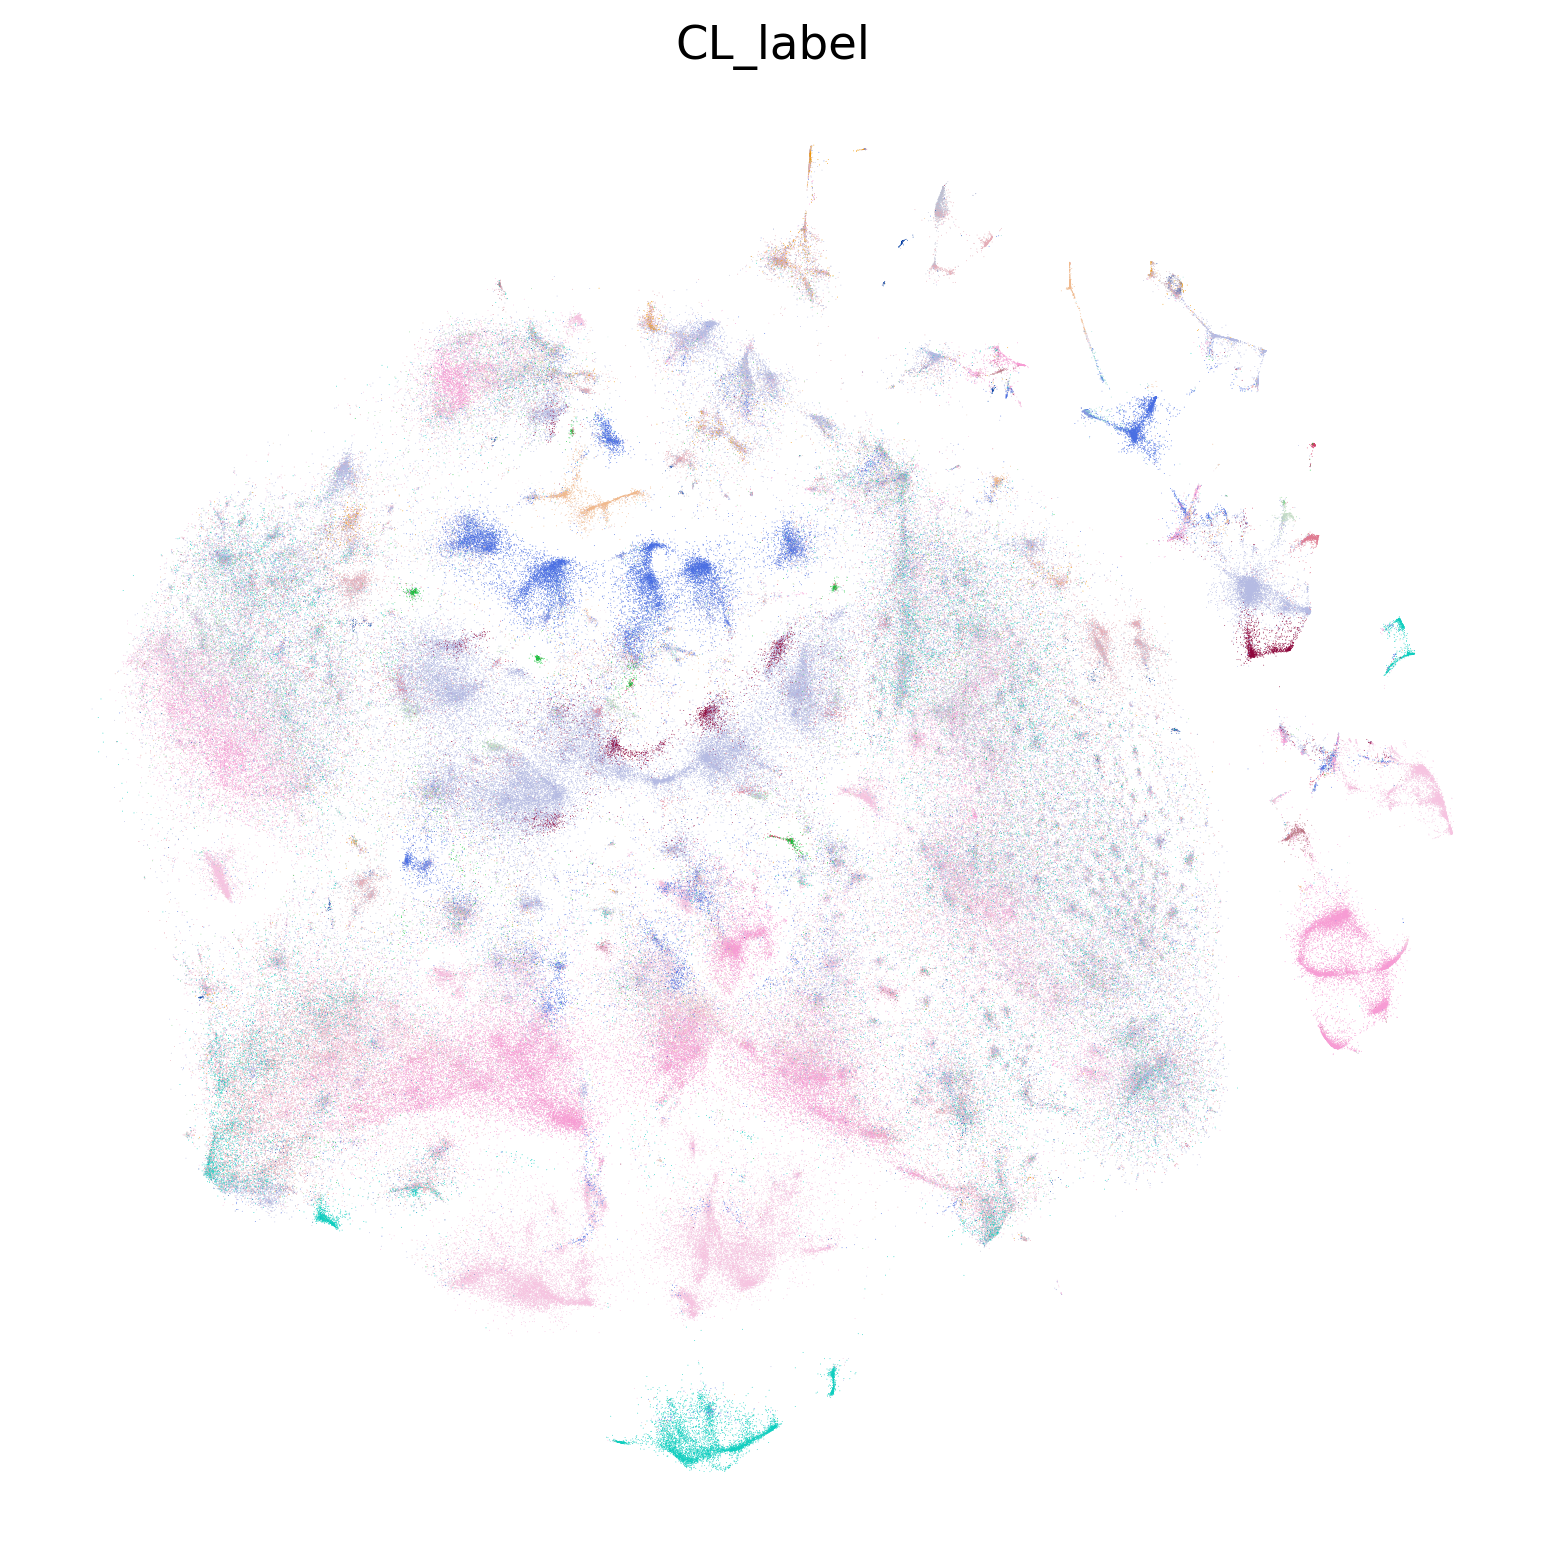

In [20]:
sc.pl.embedding(filtered_adata, basis='X_tsne', color=['CL_label'], frameon=False, legend_loc = 'best')

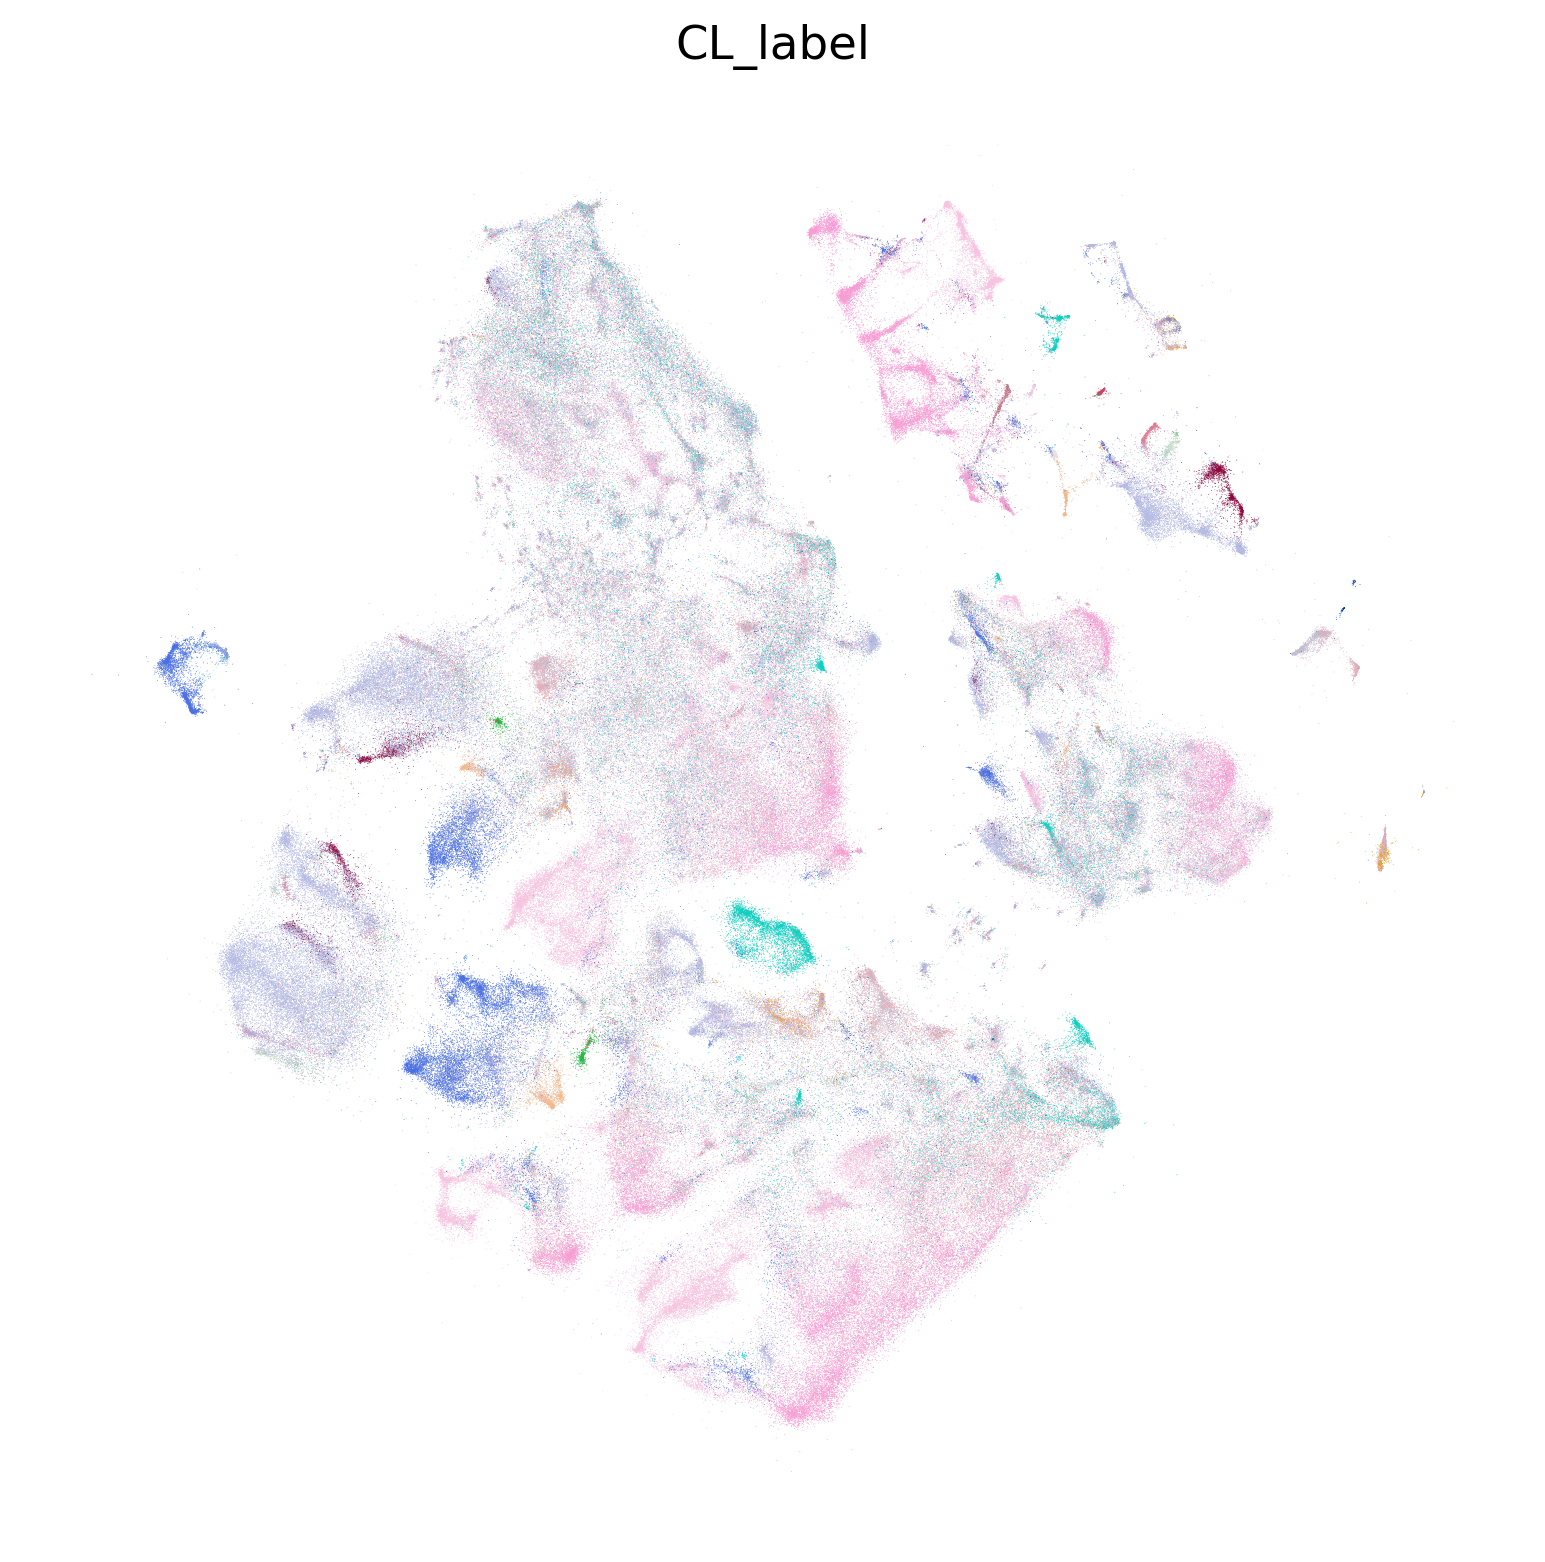

In [21]:
sc.pl.embedding(filtered_adata, basis='X_tsne_p', color=['CL_label'], frameon=False, legend_loc = 'best')

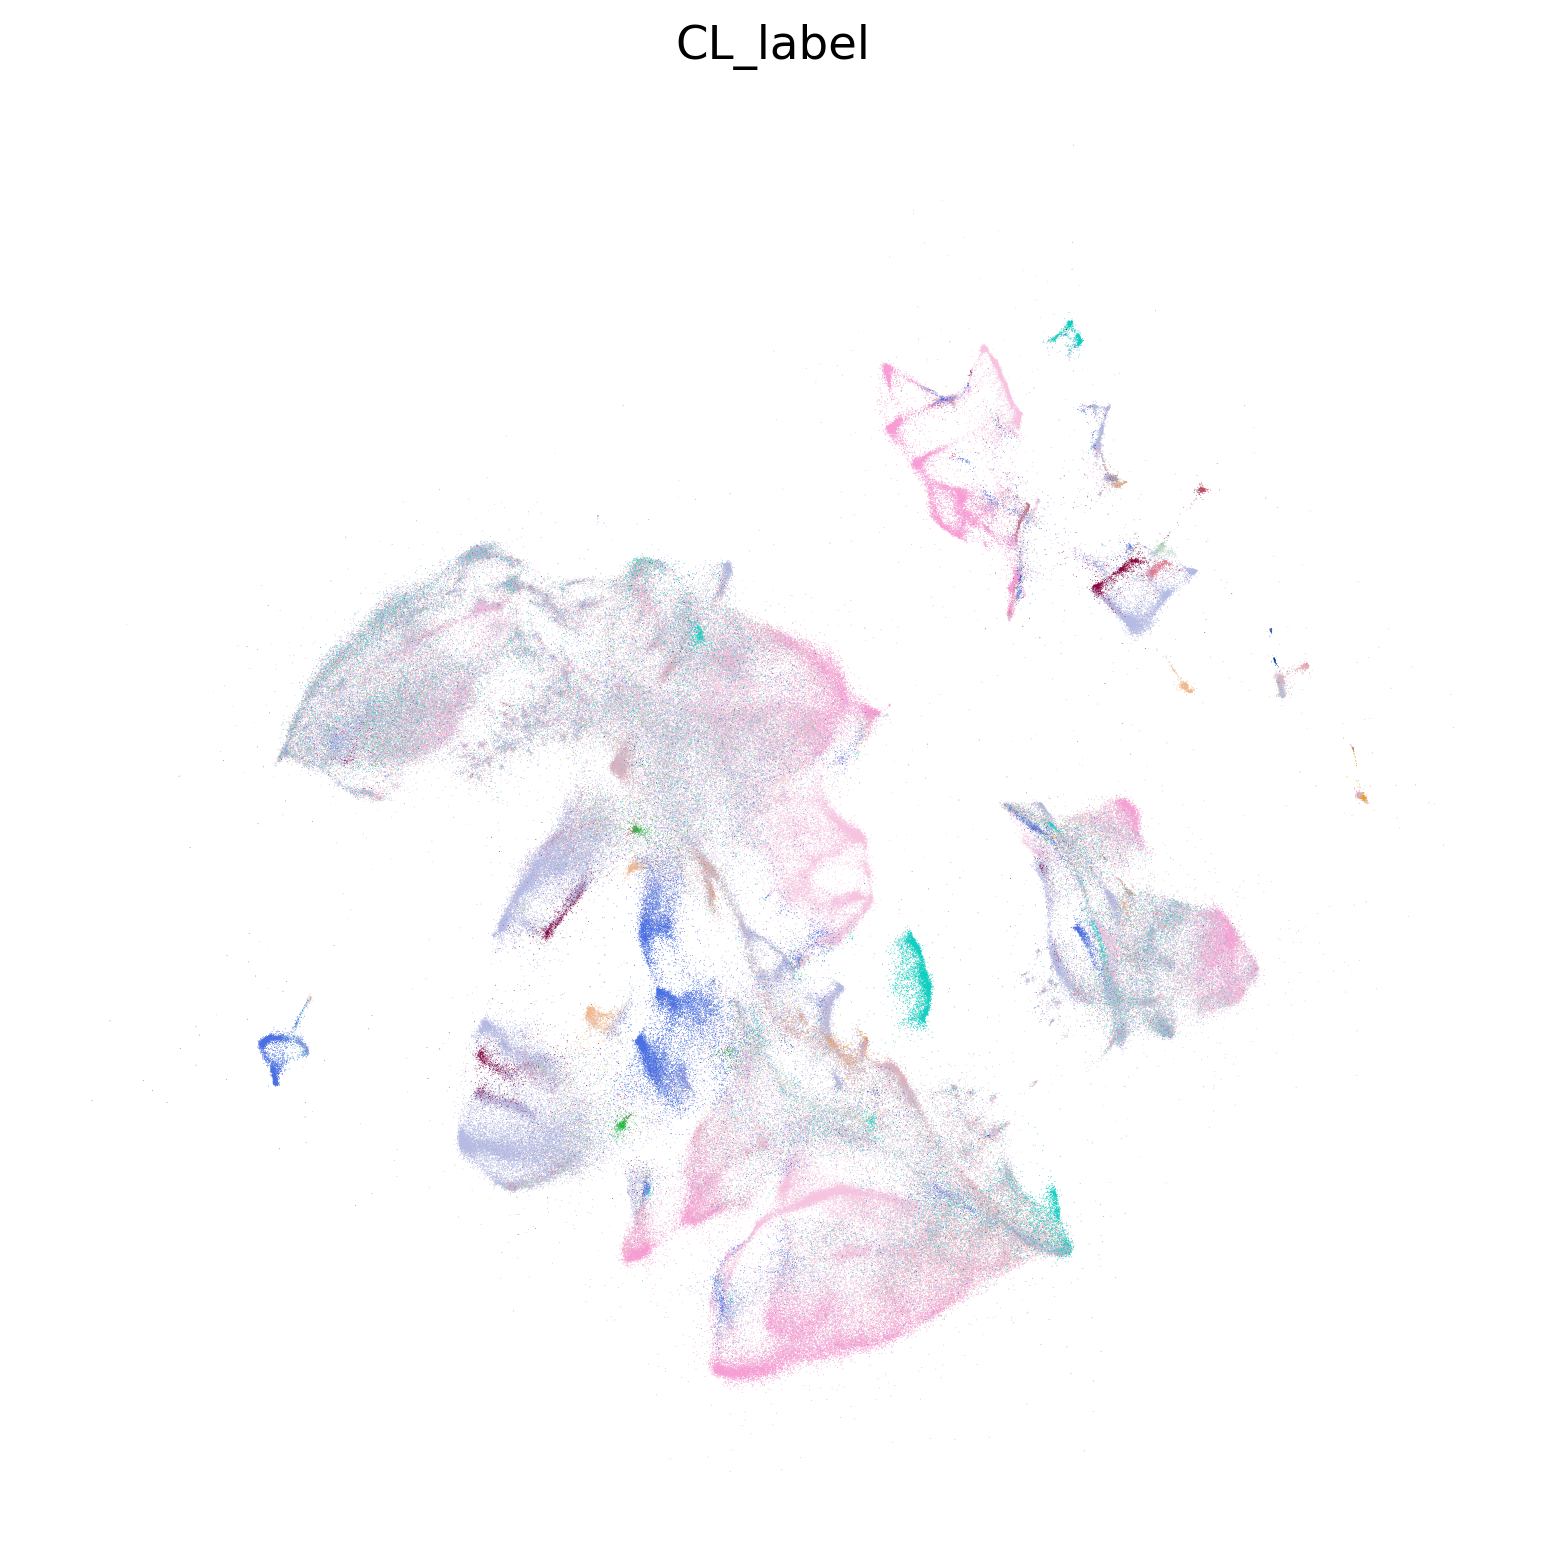

In [22]:
sc.pl.embedding(filtered_adata, basis='X_tsne_p0', color=['CL_label'], frameon=False, legend_loc = 'best')